## EDA 
### (part-2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import folium
import json
import datetime

In [2]:
data = pd.read_csv("final_data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
print("Shape of the final dataset is :",data.shape)

Shape of the final dataset is : (113105, 38)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113105 entries, 0 to 113104
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113105 non-null  object 
 1   payment_sequential             113105 non-null  int64  
 2   payment_type                   113105 non-null  object 
 3   payment_installments           113105 non-null  int64  
 4   payment_value                  113105 non-null  float64
 5   customer_id                    113105 non-null  object 
 6   order_status                   113105 non-null  object 
 7   order_purchase_timestamp       113105 non-null  object 
 8   order_approved_at              113105 non-null  object 
 9   order_delivered_carrier_date   113105 non-null  object 
 10  order_delivered_customer_date  113105 non-null  object 
 11  order_estimated_delivery_date  113105 non-null  object 
 12  review_score                  

In [4]:
rate_1 = data[data["review_score"]==1] 
rate_2 = data[data["review_score"]==2] 
rate_3 = data[data["review_score"]==3] 
rate_4 = data[data["review_score"]==4] 
rate_5 = data[data["review_score"]==5] 

### order_status analysis with review_score

In [5]:
data["order_status"].value_counts()

delivered    113105
Name: order_status, dtype: int64

<b> We have only considered delivered product for customer review score prediction. Hence, we don't analyse of order_status.

### customer_state analysis

<b> question: Customers who give 5 score are most oftenly from which state?

In [7]:
(data["customer_state"].value_counts(normalize=True)*100)[:5]

SP    42.284603
RJ    12.943725
MG    11.682949
RS     5.551479
PR     5.109412
Name: customer_state, dtype: float64

* In the main data, 42% of datapoints belongs to state SP.
 
* States like PA,MT,MS,MA,PB,RN,PI,AL,SE,TO,RO,AM,AC,AP,RR are very less, and less than 1 %.
    
* RJ is the second highest customer_state with 13% (roughly)

<b> So, most of the customers are from SP state. 

In [7]:
data.groupby("review_score")["customer_state"].value_counts().unstack()

customer_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
review_score,,,,,,,,,,,,,,,,,,,,,
1,6,72,14,3,572,221,283,310,291,148,...,600,2506,66,21,6,729,514,63,4553,24
2,8,27,15,2,175,53,78,69,87,37,...,203,588,22,20,1,199,134,15,1530,13
3,9,31,6,9,406,141,185,210,227,84,...,442,1218,44,29,7,511,380,30,3904,32
4,16,94,33,25,819,305,432,475,476,157,...,1124,2472,105,48,8,1283,796,73,9201,70
5,52,213,99,44,1874,752,1235,1215,1238,380,...,3410,7856,317,154,22,3557,2331,202,28638,189


In [8]:
print("The top 5 states, percentage of customer_states in rating 1 : \n",
                                data[(data["review_score"]==1)]["customer_state"].value_counts(normalize=True)[:5])
print("*"*30)
print("The top 5 states, percentage of customer_states in rating 2 : \n",
                                data[(data["review_score"]==2)]["customer_state"].value_counts(normalize=True)[:5])
print("*"*30)
print("The top 5 states, percentage of customer_states in rating 3 : \n",
                                data[(data["review_score"]==3)]["customer_state"].value_counts(normalize=True)[:5])
print("*"*30)
print("The top 5 states, percentage of customer_states in rating 4 : \n",
                                data[(data["review_score"]==4)]["customer_state"].value_counts(normalize=True)[:5])
print("*"*30)
print("The top 5 states, percentage of customer_states in rating 5 : \n",
                                data[(data["review_score"]==5)]["customer_state"].value_counts(normalize=True)[:5])

The top 5 states, percentage of customer_states in rating 1 : 
 SP    0.343856
RJ    0.189261
MG    0.109357
RS    0.055056
PR    0.045314
Name: customer_state, dtype: float64
******************************
The top 5 states, percentage of customer_states in rating 2 : 
 SP    0.389412
RJ    0.149656
MG    0.106134
PR    0.051667
RS    0.050649
Name: customer_state, dtype: float64
******************************
The top 5 states, percentage of customer_states in rating 3 : 
 SP    0.407814
RJ    0.127233
MG    0.118040
RS    0.053379
PR    0.046172
Name: customer_state, dtype: float64
******************************
The top 5 states, percentage of customer_states in rating 4 : 
 SP    0.423521
MG    0.117100
RJ    0.113786
RS    0.059056
PR    0.051738
Name: customer_state, dtype: float64
******************************
The top 5 states, percentage of customer_states in rating 5 : 
 SP    0.443059
RJ    0.121540
MG    0.118740
RS    0.055030
PR    0.052756
Name: customer_state, dtype: floa

* For all ratings, SP is the highest. But we cannot say this is causation, since we have more data belongs to SP compared to other states. 
* In all the ratings we have top 5 states as SP,RJ,MG,RS,PR. Since these are the states from which most of the customers come from, we cannot say the causation by this.

<b> let us analyse SP

customer_state SP percentage distribution among review_ratings : 


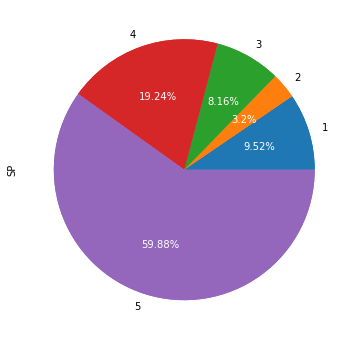

In [9]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
print("customer_state SP percentage distribution among review_ratings : ")

plt.figure(figsize=(6,6))
ax = data.groupby("customer_state")["review_score"].value_counts(normalize=True).unstack().loc["SP"].plot(kind="pie")

d = data.groupby("customer_state")["review_score"].value_counts(normalize=True).unstack().loc["SP"]

wedges, texts, autotexts = ax.pie(d, autopct=lambda pct: str(round(pct,2))+"%",
                                  textprops=dict(color="w"))


* 60% of SP state customers gave rating 5. And 20% of customers from SP gave rating 4 for the purchased products. 
* There are vey less customers from SP, who gave 1,2,3 ratings. 

<b> let us analyse RJ.

customer_state RJ percentage distribution among review_ratings : 


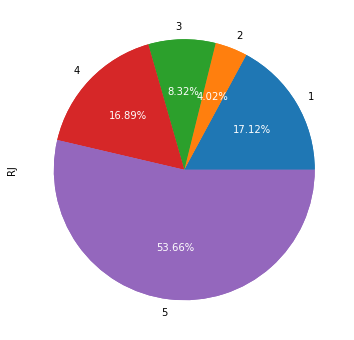

In [10]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
print("customer_state RJ percentage distribution among review_ratings : ")

plt.figure(figsize=(6,6))
ax = data.groupby("customer_state")["review_score"].value_counts(normalize=True).unstack().loc["RJ"].plot(kind="pie")

d = data.groupby("customer_state")["review_score"].value_counts(normalize=True).unstack().loc["RJ"]

wedges, texts, autotexts = ax.pie(d, autopct=lambda pct: str(round(pct,2))+"%",
                                  textprops=dict(color="w"))


* This is interesting. Most of the customers (54%) of RJ gave rating 5. But the second position is for rating 1 which has 17% of customers in RJ

In [11]:
#number of unique customers from state SP,RJ,MG
num_sp = len(data[data["customer_state"]=="SP"]["customer_unique_id"].value_counts())
print("The number of customers in state SP : ",num_sp)

num_rj = len(data[data["customer_state"]=="RJ"]["customer_unique_id"].value_counts())
print("The number of customers in state RJ : ",num_rj)

num = len(data[data["customer_state"]=="MG"]["customer_unique_id"].value_counts())
print("The number of customers in state MG : ",num)

The number of customers in state SP :  38557
The number of customers in state RJ :  11695
The number of customers in state MG :  10809


In [12]:
#total number of unique customers
tot = len(data["customer_unique_id"].value_counts())
tot

91626

In [13]:
print("Percentage of unique customers from SP out of all unique customers : ", round(num_sp*100/tot,2),"%")
print("Percentage of unique customers from RJ out of all unique customers : ", round(num_rj*100/tot,2),"%")
print("Percentage of unique customers from MG out of all unique customers : ", round(num*100/tot,2),"%")

Percentage of unique customers from SP out of all unique customers :  42.08 %
Percentage of unique customers from RJ out of all unique customers :  12.76 %
Percentage of unique customers from MG out of all unique customers :  11.8 %


* There are 91626 unique customers in the database.
* There are more number of customers from state SP which is 42%
* Around 12.7% of unique customers from state RJ, and 11.8% of customers from state MG, out of all unique customers. 
* SP,RJ,MG are the top 3 states which has more number of customers.

In [14]:
#grouped data with customer_state
grp = data.groupby("customer_state")["review_score"].value_counts(normalize=True).unstack()

In [15]:
#is there any state which has more than 20% review_score 1?
(data.groupby("customer_state")["review_score"].value_counts(normalize=True).unstack()[1]>0.20).sum()

0

In [16]:
#is there any state which has less than 50% review_score 5?
(data.groupby("customer_state")["review_score"].value_counts(normalize=True).unstack()[5]<0.50).sum()

4

In [17]:
grp[(data.groupby("customer_state")["review_score"].value_counts(normalize=True).unstack()[5]<0.50)]

review_score,1,2,3,4,5
customer_state,,,,,
AL,0.164760,0.061785,0.070938,0.215103,0.487414
BA,0.148726,0.045502,0.105564,0.212949,0.487259
MA,0.183623,0.045906,0.104218,0.194789,0.471464
PA,0.165112,0.043843,0.101679,0.208955,0.480410


* There is no state which has more than 20% customers who gave more than 20% review_score 1.
* There are 4 states which has less than 50% customers who gave 5 score rating. But in these states also, % of score 5 is more compared to review_score 1 and 4.


- <b> From the above analysis, we got the insights : </b>
    - state SP has more number of customers and SP has more % share of customers in all the review_score.
    - Also, 60% of the customers from SP are satisfied and gave rating 5. Andabout 19% of customers gave rating 4. 
    - The reason behind the more satisfied customers from SP is not actually known at present. We need more analysis to get the information about this. 
    - There is no state which has more than 20% customers who are not satisfied and gave rating 1. 
    - % of customers who gave rating 5 is significantly more in all the states compared to other ratings.This conclusion is because we analysed the states which has less than 50% customers who gave review_score 5.

### seller_state analysis

In [18]:
data["seller_state"].value_counts(normalize=True)

SP    0.707873
MG    0.078918
PR    0.078414
RJ    0.043756
SC    0.038371
RS    0.019495
DF    0.007754
BA    0.006003
GO    0.004642
PE    0.004076
MA    0.003572
ES    0.003280
MT    0.001291
CE    0.000866
MS    0.000522
RN    0.000477
PB    0.000354
RO    0.000124
PI    0.000097
SE    0.000088
AM    0.000027
Name: seller_state, dtype: float64

* This is highly skewed. About 71% of the orders to sellers from state SP.
* There are 8% of orders to sellers from MG and PR. orders to Sellers from other states are very very less. 
* This could be one of the reason that, most customers from SP gave rating 5. There is some chance that if customer and seller both belongs to same state, the customer could be satisfied and give good rating. This might due to early delivery or anything, we don't know. But if customer and seller belongs to same state, then there could be fast delivery of product. 

In [19]:
print("The top 5 states, percentage of seller_state in rating 1 : \n",
                                data[(data["review_score"]==1)]["seller_state"].value_counts(normalize=True)[:5])
print("*"*30)
print("The top 5 states, percentage of seller_state in rating 2 : \n",
                                data[(data["review_score"]==2)]["seller_state"].value_counts(normalize=True)[:5])
print("*"*30)
print("The top 5 states, percentage of seller_state in rating 3 : \n",
                                data[(data["review_score"]==3)]["seller_state"].value_counts(normalize=True)[:5])
print("*"*30)
print("The top 5 states, percentage of seller_state in rating 4 : \n",
                                data[(data["review_score"]==4)]["seller_state"].value_counts(normalize=True)[:5])
print("*"*30)
print("The top 5 states, percentage of seller_state in rating 5 : \n",
                                data[(data["review_score"]==5)]["seller_state"].value_counts(normalize=True)[:5])

The top 5 states, percentage of seller_state in rating 1 : 
 SP    0.733555
PR    0.073937
MG    0.067744
RJ    0.042822
SC    0.034287
Name: seller_state, dtype: float64
******************************
The top 5 states, percentage of seller_state in rating 2 : 
 SP    0.760244
PR    0.069229
MG    0.067702
SC    0.038178
RJ    0.033851
Name: seller_state, dtype: float64
******************************
The top 5 states, percentage of seller_state in rating 3 : 
 SP    0.732477
MG    0.077092
PR    0.072496
SC    0.035934
RJ    0.035725
Name: seller_state, dtype: float64
******************************
The top 5 states, percentage of seller_state in rating 4 : 
 SP    0.708032
MG    0.080783
PR    0.076778
RJ    0.039448
SC    0.038435
Name: seller_state, dtype: float64
******************************
The top 5 states, percentage of seller_state in rating 5 : 
 SP    0.695732
MG    0.081532
PR    0.081316
RJ    0.047187
SC    0.039559
Name: seller_state, dtype: float64


* In all the review_score, SP has the highest seller percentage share. 

<b> let us analyse SP sellers.

seller SP percentage distribution among review_ratings : 


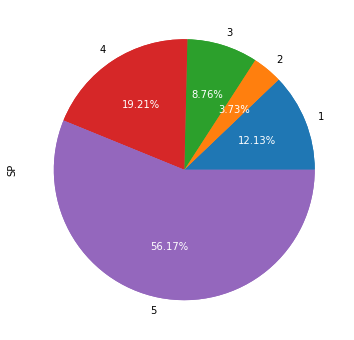

In [20]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
print("seller SP percentage distribution among review_ratings : ")

plt.figure(figsize=(6,6))
ax = data.groupby("seller_state")["review_score"].value_counts(normalize=True).unstack().loc["SP"].plot(kind="pie")

d = data.groupby("seller_state")["review_score"].value_counts(normalize=True).unstack().loc["SP"]

wedges, texts, autotexts = ax.pie(d, autopct=lambda pct: str(round(pct,2))+"%",
                                  textprops=dict(color="w"))


* 56% of orders to sellers from state SP, get review_score 5, and 19% of orders from sellers get review_score 4.
* So, most of the orders to sellers from SP got good ratings 

In [21]:
#grouped data with customer_state
grp = data.groupby("seller_state")["review_score"].value_counts(normalize=True).unstack()

In [22]:
#is there any seller state which has more than 20% review_score 1?
(data.groupby("seller_state")["review_score"].value_counts(normalize=True).unstack()[1]>0.20).sum()

1

In [23]:
grp[(data.groupby("seller_state")["review_score"].value_counts(normalize=True).unstack()[1]>0.20)]

review_score,1,2,3,4,5
seller_state,,,,,
AM,0.666667,NaN,NaN,NaN,0.333333


In [24]:
#is there any state which has less than 50% review_score 5?
(data.groupby("seller_state")["review_score"].value_counts(normalize=True).unstack()[5]<0.50).sum()

1

In [25]:
grp[(data.groupby("seller_state")["review_score"].value_counts(normalize=True).unstack()[5]<0.50)]

review_score,1,2,3,4,5
seller_state,,,,,
AM,0.666667,NaN,NaN,NaN,0.333333


* AM state has more sellers who got review_score 1 than review_score 5.

In [26]:
#AM state
data[data["seller_state"]=="AM"]["review_score"].value_counts()

1    2
5    1
Name: review_score, dtype: int64

* There is only 3 orders to the sellers of state AM. 
* Out of 3, there are 2 bad ratings(1).
* Since there are very very less orders in this, we cannot say anything more than this. 

- <b> From the above analysis we got the insights : </b>
    - Sellers of state SP has highest number orders.
    - Orders to sellers of state SP, got 56% of review_score 1.
    - In all review_scores, orders to sellers from state SP, has highhest % share, this is due to the fact that, there are high number of orders to sellers from state SP.

In [27]:
#number of sellers from state SP, PR, MG
num_sp = len(data[data["seller_state"]=="SP"]["seller_id"].value_counts())
print("The number of sellers in state SP : ",num_sp)

num_pr = len(data[data["seller_state"]=="PR"]["seller_id"].value_counts())
print("The number of sellers in state PR : ",num_pr)

num = len(data[data["seller_state"]=="MG"]["seller_id"].value_counts())
print("The number of sellers in state MG : ",num)

The number of sellers in state SP :  1701
The number of sellers in state PR :  341
The number of sellers in state MG :  232


In [28]:
#total number of sellers
tot = len(data["seller_id"].value_counts())
tot

2907

In [29]:
print("Percentage of sellers from SP out of all unique customers : ", round(num_sp*100/tot,2),"%")
print("Percentage of sellers from PR out of all unique customers : ", round(num_pr*100/tot,2),"%")
print("Percentage of sellers from MG out of all unique customers : ", round(num*100/tot,2),"%")

Percentage of sellers from SP out of all unique customers :  58.51 %
Percentage of sellers from PR out of all unique customers :  11.73 %
Percentage of sellers from MG out of all unique customers :  7.98 %


* There are total 2907 sellers in the database.
* Out of total, 58.5% of sellers from state SP
* We can clearly see that there are more number of sellers from state SP.
* So, obviously number of orders from SP is high. 
* Out of total, 11.7% of sellers from state PR, and 8% of sellers from state MG.
* These(SP,PR,MG) are the 3 states of sellers, where sellers got highest orders.

<b>From the analysis of customer seller and state info, we got some important insights</b>

    - State SP has the highest number of customers(42%), aas well as highest sellers(58.5%). 
    - This could be the reason for most of the customers from state SP are satisfied and gave rating 5, and most of the sellers got rating 5.
    - review_rating 5 is dominant in all the customer_states as well as seller_states. 
    - General trend is star: 5 >> star 4 >= star 1 > star 2 >= star 3. 

### Product_category_name analysis.

In [30]:
data["product_category_name"].value_counts(normalize=True)[:10]

bed_bath_table           0.103426
health_beauty            0.086150
sports_leisure           0.077167
furniture_decor          0.075912
computers_accessories    0.069882
housewares               0.063304
watches_gifts            0.053464
telephony                0.040396
garden_tools             0.039450
auto                     0.037823
Name: product_category_name, dtype: float64

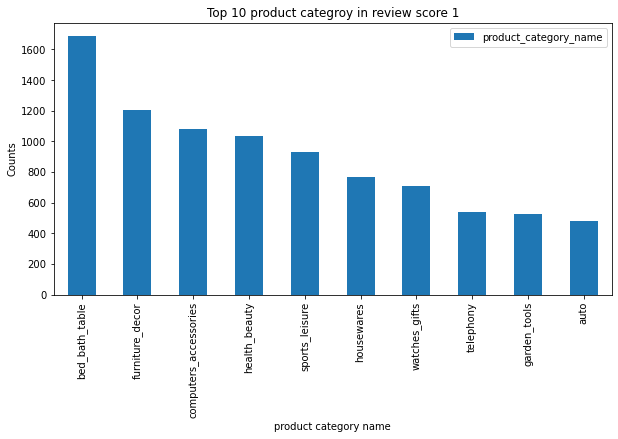

Percentage cover of top 10 categories in review 1 : 
67.684 %


In [31]:
rate_1["product_category_name"].value_counts()[:10].plot.bar(figsize=(10,5)).legend()
plt.xlabel("product category name")
plt.ylabel("Counts")
plt.title("Top 10 product categroy in review score 1")
plt.show()

print("Percentage cover of top 10 categories in review 1 : ")
print((rate_1["product_category_name"].value_counts(normalize=True)[:10].sum()*100).round(3),"%")

* bed_bath_table is the most occuring category in rating 1, followed by furniture_decor
* We can see the top 10 categories in review score 1 cover 67.7% of categories.

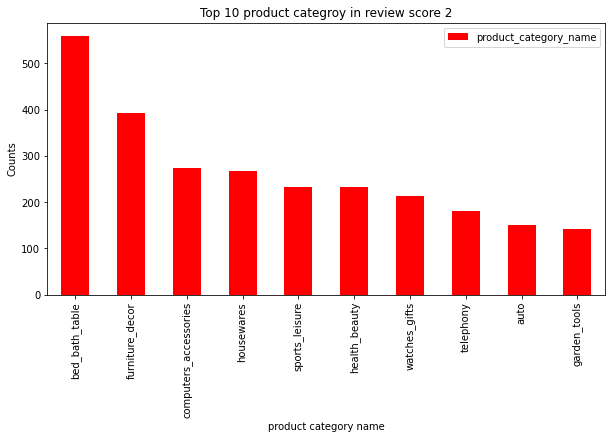

Percentage cover of top 10 categories in review 2 : 
67.32 %


In [32]:
rate_2["product_category_name"].value_counts()[:10].plot.bar(figsize=(10,5),color="red").legend()
plt.xlabel("product category name")
plt.ylabel("Counts")
plt.title("Top 10 product categroy in review score 2")
plt.show()

print("Percentage cover of top 10 categories in review 2 : ")
print((rate_2["product_category_name"].value_counts(normalize=True)[:10].sum()*100).round(3),"%")

* Distribution is almost similar to review score 1. 
* Top 10 categories cover 67.3% of all categories in rating 2.
* bed_bath_table is most occuring category in review_rating 2 followed by furniture_decor

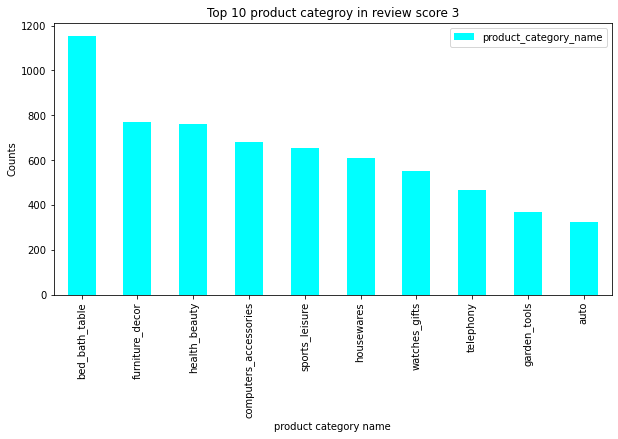

Percentage cover of top 10 categories in review 3 : 
66.144 %


In [33]:
rate_3["product_category_name"].value_counts()[:10].plot.bar(figsize=(10,5),color="cyan").legend()
plt.xlabel("product category name")
plt.ylabel("Counts")
plt.title("Top 10 product categroy in review score 3")
plt.show()

print("Percentage cover of top 10 categories in review 3 : ")
print((rate_3["product_category_name"].value_counts(normalize=True)[:10].sum()*100).round(3),"%")

* Top 10 categories covers 66% of categories in review score 3.
* bed_bath_table is the most frequent category, and furniture_decor and health_beauty take the seconf and 3rd place.

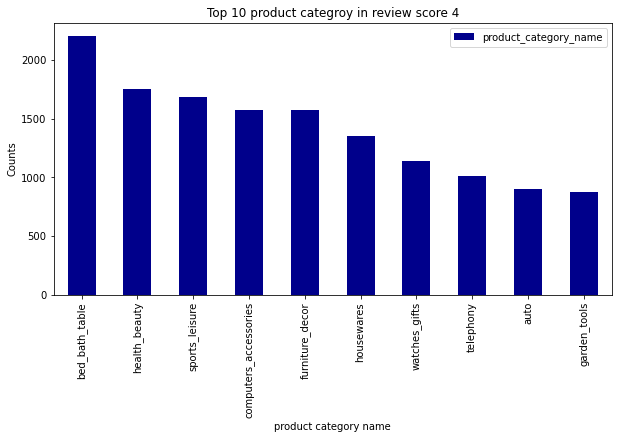

Percentage cover of top 10 categories in review 4 : 
64.713 %


In [34]:
rate_4["product_category_name"].value_counts()[:10].plot.bar(figsize=(10,5),color="darkblue").legend()
plt.xlabel("product category name")
plt.ylabel("Counts")
plt.title("Top 10 product categroy in review score 4")
plt.show()

print("Percentage cover of top 10 categories in review 4 : ")
print((rate_4["product_category_name"].value_counts(normalize=True)[:10].sum()*100).round(3),"%")

* Top 10 categories covers 64.7% of categories in review_score 4.
* bed_bath_table, health_beauty are top 2 categories in rating 4.


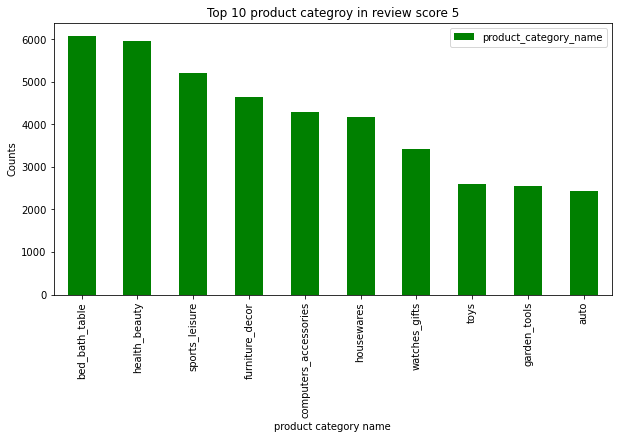

Percentage cover of top 10 categories in review 5 : 
64.05 %


In [35]:
rate_5["product_category_name"].value_counts()[:10].plot.bar(figsize=(10,5),color="green").legend()
plt.xlabel("product category name")
plt.ylabel("Counts")
plt.title("Top 10 product categroy in review score 5")
plt.show()

print("Percentage cover of top 10 categories in review 5 : ")
print((rate_5["product_category_name"].value_counts(normalize=True)[:10].sum()*100).round(3),"%")

* Top 10 categories covers 64% of categories in review_rating 5.
* bed_bath_table is highest. health_beauty is also nearly equal to bed_bath_beauty.

<b> bed_bath_table is more frequent in all review_scores. Lets analyze this based on review_score.

bed_bath_table percentage distribution among review_ratings : 


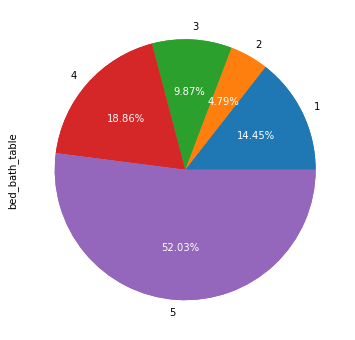

In [36]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
print("bed_bath_table percentage distribution among review_ratings : ")

plt.figure(figsize=(6,6))
ax = data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack().loc["bed_bath_table"].plot(kind="pie")

d = data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack().loc["bed_bath_table"]

wedges, texts, autotexts = ax.pie(d, autopct=lambda pct: str(round(pct,2))+"%",
                                  textprops=dict(color="w"))


- bed_bath_table is most frequent in all ratings. 
- bed_bath_table 52% of the times get 5 star rating. 19% times 4 rating. and 14% of the times 1 rating.

<b> health_beauty is the second most frequent in review_score 4 and 5. let us analysise this based on review_score

health_beauty percentage distribution among review_ratings : 


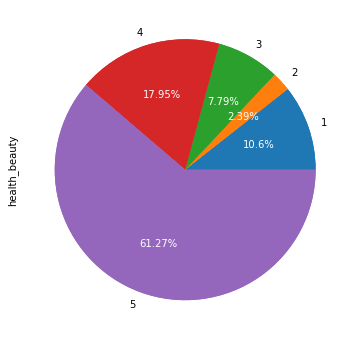

In [37]:
print("health_beauty percentage distribution among review_ratings : ")

plt.figure(figsize=(6,6))
ax = data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack().loc["health_beauty"].plot(kind="pie")

d = data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack().loc["health_beauty"]

wedges, texts, autotexts = ax.pie(d, autopct=lambda pct: str(round(pct,2))+"%",
                                  textprops=dict(color="w"))


* health_beauty category 61% of the times gets 5 score rating. Also 18% of the times gets 4 rating. 
* Health_beaty is one category which gets more 5 star ratings compared to other ratings. 
* More Customers could be satisfed with this product.

<b> furniture_decor is present 2nd most frequent in 1,2,3 ratings. Let us analyse the score distribution

furniture_decor percentage distribution among review_ratings : 


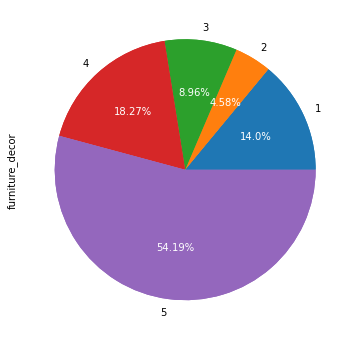

In [38]:
print("furniture_decor percentage distribution among review_ratings : ")

plt.figure(figsize=(6,6))
ax = data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack().loc["furniture_decor"].plot(kind="pie")

d = data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack().loc["furniture_decor"]

wedges, texts, autotexts = ax.pie(d, autopct=lambda pct: str(round(pct,2))+"%",
                                  textprops=dict(color="w"))


* Share of score 5 is 54.19% in furniture_decor. 
* 72% of the times, furniture_decor gets rating 4 or 5.

In [39]:
#grouped data with product_category_name
grp = data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack()

In [40]:
#is there any category which has more than 50% review_score 1?
(data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack()[1]>0.50).sum()

0

In [41]:
#is there any category which has more  than or equal to 50% of review_score 1?
(data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack()[1]>=0.50).sum()

1

* There is no category which has more than 50% review_score 1.
* But there is 1 category which has review_score share 50%

In [42]:
#product category which has more than or equal to 50% review_score 1.
grp[(data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack()[1]>=0.50)]

review_score,1,2,3,4,5
product_category_name,,,,,
security_and_services,0.5,NaN,NaN,0.5,NaN


* security_and_services has 50% of review_score 1, and 50% of review_score 4.

In [43]:
data[data["product_category_name"]=="security_and_services"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name
15365,bede3503afed051733eeb4a84d1adcc5,1,boleto,1,115.45,919570a26efbd068d6a0f66d5c5072a3,delivered,2017-09-17 16:51:43,2017-09-19 04:05:52,2017-09-19 20:22:49,...,4e922959ae960d389249c378d1c939f5,2017-09-26 04:05:52,100.00,15.45,12327,-23.298186,-45.974828,jacarei,SP,security_and_services
19515,2c4ada2e75c2ad41dd93cebb5df5f023,1,credit_card,1,209.06,363d3a9b2ec5c5426608688ca033292d,delivered,2017-01-26 11:09:00,2017-01-26 11:22:17,2017-01-27 14:59:35,...,48162d548f5b1b11b9d29d1e01f75a61,2017-01-30 11:09:00,183.29,25.77,13403,-22.727375,-47.670610,piracicaba,SP,security_and_services


* So, there are  only 2 orders  which belong to security_and_services. 
* We cannot get much information from this.

In [44]:
#categories which has more than or equal to 20% review_score 1.
grp[(data.groupby("product_category_name")["review_score"].value_counts(normalize=True).unstack()[1]>=0.20)]

review_score,1,2,3,4,5
product_category_name,,,,,
diapers_and_hygiene,0.216216,NaN,0.297297,0.162162,0.324324
fashion_male_clothing,0.253623,0.036232,0.050725,0.144928,0.514493
home_comfort_2,0.290323,0.032258,0.096774,0.161290,0.419355
la_cuisine,0.250000,NaN,NaN,0.062500,0.687500
pc_gamer,0.333333,NaN,NaN,0.333333,0.333333
security_and_services,0.500000,NaN,NaN,0.500000,NaN


In [45]:
#home_comfort_2
data[data["product_category_name"]=="home_comfort_2"]["review_score"].value_counts()

5    13
1     9
4     5
3     3
2     1
Name: review_score, dtype: int64

In [46]:
#fashion_male_clothing
data[data["product_category_name"]=="fashion_male_clothing"]["review_score"].value_counts()

5    71
1    35
4    20
3     7
2     5
Name: review_score, dtype: int64

* There are very less orders incase of these categories which has more than 20% review_score 1. 
* In fashion_male_clothing customers have mixed feeling, since there are significant number of review_score 1 as well as reveiw_score 5.

* <b> From all the plots and analysis of product category, the insights we got are as follows:</b>

    -  bed_bathing_table category is most frequent in all review_score, Also it covers more than 60% of the categories in all the review_scores
    - 52% of the times bed_bathing_table gets review_score 5. And 14% of the times it gets review_score 1. 
    - health_beauty is one of the category which has nearly same % of share in categories in review_rating 5. Incase of score 4 also, it is 2nd most frequent category. 
    -  61% of the times health_beauty gets score 5, and 18% of the times it gets score 4. Mostly customers are higly satisfied with this category of products. only 10% of the times it gets review_score 1. 
    - There are very few categories which has more than 20% review_score 1. Also these categories have very less orders. 
    - In all the categories % share of review_score 5 is high, review_score 4 and review_score 1 take the next positions. score 2, 3 are very less in all the categories. 
    - Ofcourse in the whole dataset, % of review_score 5 is very high. But after analysing the product category also, we don't get any significant product_category which more score 1 than others. 
    
    
    

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113105 entries, 0 to 113104
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113105 non-null  object 
 1   payment_sequential             113105 non-null  int64  
 2   payment_type                   113105 non-null  object 
 3   payment_installments           113105 non-null  int64  
 4   payment_value                  113105 non-null  float64
 5   customer_id                    113105 non-null  object 
 6   order_status                   113105 non-null  object 
 7   order_purchase_timestamp       113105 non-null  object 
 8   order_approved_at              113105 non-null  object 
 9   order_delivered_carrier_date   113105 non-null  object 
 10  order_delivered_customer_date  113105 non-null  object 
 11  order_estimated_delivery_date  113105 non-null  object 
 12  review_score                  

### Analysis of product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_name_lenght 

In [48]:
data.groupby("product_photos_qty")["review_score"].value_counts().unstack()

review_score,1,2,3,4,5
product_photos_qty,,,,,
1.0,7215.0,2073.0,4840.0,10722.0,32379.0
2.0,2486.0,777.0,1830.0,4312.0,12928.0
3.0,1389.0,350.0,1078.0,2510.0,7285.0
4.0,944.0,324.0,777.0,1664.0,4887.0
5.0,511.0,156.0,426.0,1149.0,3222.0
6.0,377.0,148.0,367.0,821.0,2118.0
7.0,150.0,36.0,122.0,264.0,866.0
8.0,66.0,26.0,60.0,145.0,456.0
9.0,37.0,15.0,25.0,45.0,187.0


* So, irrespective of number of photos, rating 5 is high in all the numbers of photos.
* generally, counts trend is, 5 star >> 4 star > 1 star> 3 star > 2 star.

In [49]:
data.groupby("review_score")["product_photos_qty"].value_counts(normalize=True).unstack()

product_photos_qty,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,17.0,18.0,19.0,20.0
review_score,,,,,,,,,,,,,,,,,,,
1,0.544898,0.187750,0.104901,0.071294,0.038592,0.028472,0.011328,0.004985,0.002794,0.002870,0.000982,0.000604,0.000076,0.000151,NaN,0.000227,NaN,0.000076,NaN
2,0.527615,0.197760,0.089081,0.082464,0.039705,0.037669,0.009163,0.006617,0.003818,0.003563,0.001018,0.001273,NaN,NaN,NaN,0.000255,NaN,NaN,NaN
3,0.505589,0.191163,0.112608,0.081166,0.044500,0.038337,0.012744,0.006268,0.002612,0.003761,0.000209,0.000731,0.000313,NaN,NaN,NaN,NaN,NaN,NaN
4,0.493533,0.198481,0.115535,0.076594,0.052888,0.037791,0.012152,0.006674,0.002071,0.002854,0.000598,0.000276,0.000230,NaN,0.000138,0.000138,0.000046,NaN,NaN
5,0.500936,0.200009,0.112706,0.075607,0.049848,0.032768,0.013398,0.007055,0.002893,0.003017,0.000619,0.000511,0.000325,0.000062,0.000124,0.000062,0.000046,NaN,0.000015


* From this table also, we can see that, more number of photos will not tend to get more 5 star rating.
* In all review_score sets, % of counts decreases as number of photos increases. 


<b> product_weight_g

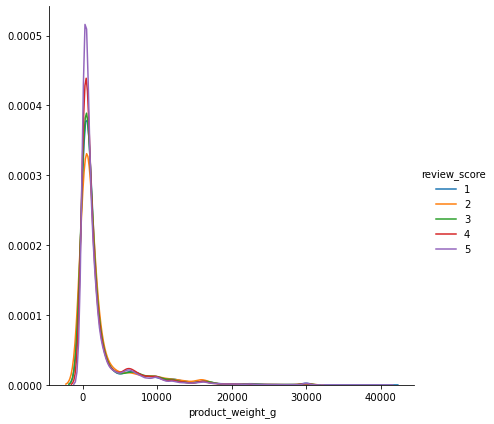

In [287]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"product_weight_g")\
    .add_legend()
plt.show()

* pdf of review_score 5 is higly peaked at lower values of product weight.
* Except the value near 0, in all other places all pdfs are merged. 

In [289]:
for i in range(95,100):
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["product_weight_g"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

95th percentile 
 review_score
1    11400.0
2    11350.0
3    10180.0
4     9810.4
5     9400.0
Name: product_weight_g, dtype: float64
****************************************
96th percentile 
 review_score
1    12500.00
2    12446.96
3    11578.00
4    10800.00
5    10250.00
Name: product_weight_g, dtype: float64
****************************************
97th percentile 
 review_score
1    14350.0
2    14008.0
3    12700.0
4    12275.0
5    12000.0
Name: product_weight_g, dtype: float64
****************************************
98th percentile 
 review_score
1    16500.00
2    15800.00
3    15700.00
4    15258.84
5    14900.00
Name: product_weight_g, dtype: float64
****************************************
99th percentile 
 review_score
1    20900.0
2    17600.0
3    17714.0
4    18000.0
5    18150.0
Name: product_weight_g, dtype: float64
****************************************


* From 95th to 98th percentiles of weight of product, trend of review_score is 5<4<3<2<1.
* At 99th percentile review_score 2 and 3 has low weight compared to other scores.
* This analysis is very extreme. Let us have a look at other percentiles.

In [290]:
lst=[50,75,80,85]    #let us check these percentile values
for i in lst:
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["product_weight_g"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

50th percentile 
 review_score
1    750.0
2    728.0
3    700.0
4    700.0
5    696.0
Name: product_weight_g, dtype: float64
****************************************
75th percentile 
 review_score
1    1850.0
2    1900.0
3    1825.0
4    1850.0
5    1750.0
Name: product_weight_g, dtype: float64
****************************************
80th percentile 
 review_score
1    2600.0
2    2600.0
3    2550.0
4    2600.0
5    2350.0
Name: product_weight_g, dtype: float64
****************************************
85th percentile 
 review_score
1    4105.0
2    4338.0
3    3910.0
4    4060.0
5    3400.0
Name: product_weight_g, dtype: float64
****************************************


* There is no much difference between median values of weights of review_scores. 
* generally 5<4<3<2<1. But this difference is not so large.

<b>product_length_cm

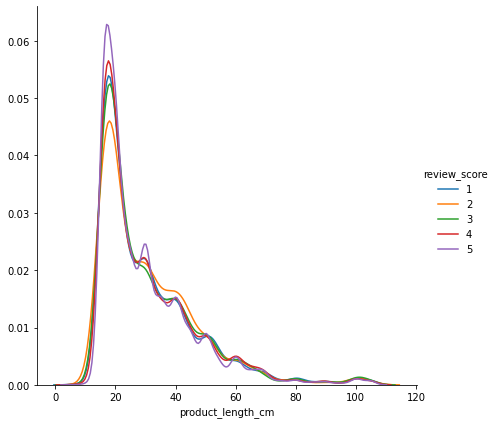

In [291]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"product_length_cm")\
    .add_legend()
plt.show()

* At lower values of length, review_score 5 is most peaked. 
* At higher values 30 to 50, pdf of review_score 2 is higher.

In [52]:
data.groupby("review_score")["product_length_cm"].mean()

review_score
1    30.727815
2    31.149911
3    30.822731
4    30.642071
5    29.936816
Name: product_length_cm, dtype: float64

* Not much difference in mean lengths.

In [293]:
lst=[50,75,80,85]    #let us check these percentile values
for i in lst:
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["product_length_cm"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

50th percentile 
 review_score
1    25.0
2    26.0
3    25.0
4    25.0
5    25.0
Name: product_length_cm, dtype: float64
****************************************
75th percentile 
 review_score
1    39.0
2    40.0
3    40.0
4    40.0
5    37.0
Name: product_length_cm, dtype: float64
****************************************
80th percentile 
 review_score
1    42.0
2    43.0
3    42.0
4    42.0
5    40.0
Name: product_length_cm, dtype: float64
****************************************
85th percentile 
 review_score
1    46.0
2    46.0
3    46.2
4    46.0
5    45.0
Name: product_length_cm, dtype: float64
****************************************


* We have checked different percentiles. All the values are almost same.

<b> product_height_cm

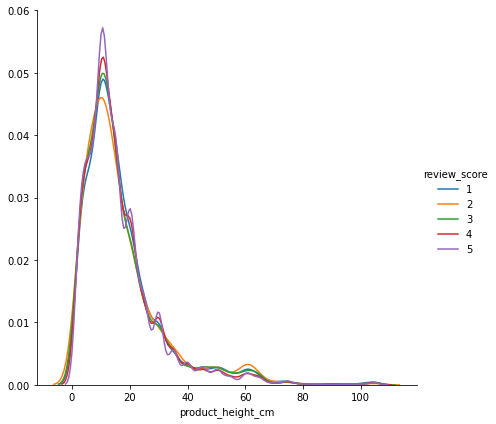

In [297]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"product_height_cm")\
    .add_legend()
plt.show()

* pdf s of all the review_scopres are merged. 
* after height above 60, review_score 2 has higher density compared to other scores.

In [53]:
data.groupby("review_score")["product_height_cm"].mean()

review_score
1    17.357752
2    17.199033
3    16.857829
4    16.643222
5    16.420533
Name: product_height_cm, dtype: float64

* Mean values are almost same.

In [298]:
lst=[50,75,80,85]    #let us check these percentile values
for i in lst:
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["product_height_cm"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

50th percentile 
 review_score
1    14.0
2    13.0
3    13.0
4    13.0
5    13.0
Name: product_height_cm, dtype: float64
****************************************
75th percentile 
 review_score
1    21.0
2    21.0
3    20.0
4    20.0
5    20.0
Name: product_height_cm, dtype: float64
****************************************
80th percentile 
 review_score
1    25.0
2    25.0
3    24.0
4    23.0
5    22.0
Name: product_height_cm, dtype: float64
****************************************
85th percentile 
 review_score
1    28.0
2    30.0
3    28.0
4    27.0
5    26.0
Name: product_height_cm, dtype: float64
****************************************


* Considered percentile values also almost same. as well as median.

<b> product_width_cm

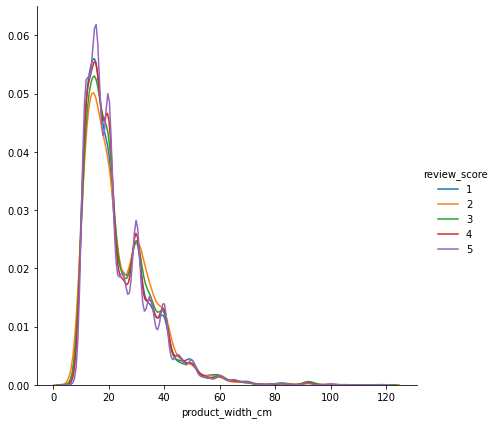

In [299]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"product_width_cm")\
    .add_legend()
plt.show()

* density of review_score 2 is low at lower values of width compared to other scores, but it is higher near 30cm to 40cm.
* Apart from that plot is overlapped. We cannot get more information from this.

In [54]:
data.groupby("review_score")["product_width_cm"].mean()

review_score
1    23.189865
2    23.750064
3    23.448658
4    23.208930
5    22.940406
Name: product_width_cm, dtype: float64

In [300]:
lst=[50,75,80,85]    #let us check these percentile values
for i in lst:
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["product_width_cm"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

50th percentile 
 review_score
1    20.0
2    20.0
3    20.0
4    20.0
5    20.0
Name: product_width_cm, dtype: float64
****************************************
75th percentile 
 review_score
1    30.0
2    30.0
3    30.0
4    30.0
5    30.0
Name: product_width_cm, dtype: float64
****************************************
80th percentile 
 review_score
1    31.0
2    33.0
3    32.0
4    31.0
5    30.0
Name: product_width_cm, dtype: float64
****************************************
85th percentile 
 review_score
1    35.0
2    35.0
3    35.0
4    35.0
5    35.0
Name: product_width_cm, dtype: float64
****************************************


* Mean, median, some percentiles all are not very different among review_scores.

<b> product_name_lenght

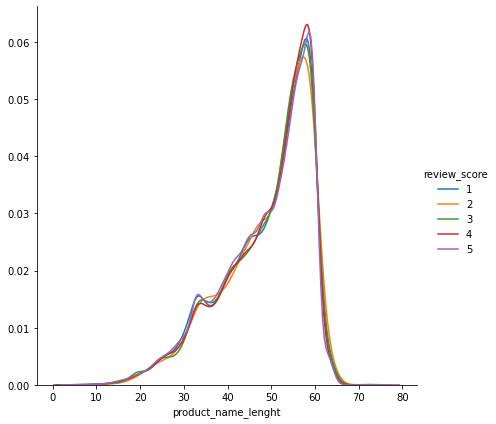

In [302]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"product_name_lenght")\
    .add_legend()
plt.show()

* This is left skewed distribution.
* Plot is highly overlapped.


In [55]:
data.groupby("review_score")["product_name_lenght"].mean()

review_score
1    48.874858
2    49.171545
3    49.083777
4    49.090955
5    48.607083
Name: product_name_lenght, dtype: float64

In [56]:
lst=[50,75,80,85]    #let us check these percentile values
for i in lst:
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["product_name_lenght"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

50th percentile 
 review_score
1    52.0
2    52.0
3    52.0
4    52.0
5    51.0
Name: product_name_lenght, dtype: float64
****************************************
75th percentile 
 review_score
1    57.0
2    57.0
3    57.0
4    57.0
5    57.0
Name: product_name_lenght, dtype: float64
****************************************
80th percentile 
 review_score
1    58.0
2    58.0
3    58.0
4    58.0
5    58.0
Name: product_name_lenght, dtype: float64
****************************************
85th percentile 
 review_score
1    59.0
2    59.0
3    59.0
4    59.0
5    59.0
Name: product_name_lenght, dtype: float64
****************************************


* No helpful insights from this.

<b> product_description_lenght

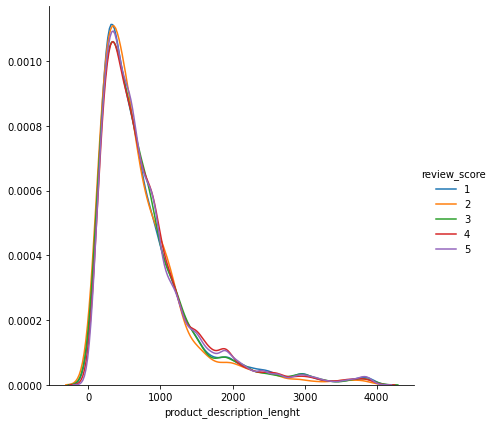

In [57]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"product_description_lenght")\
    .add_legend()
plt.show()

* highly overlapped pdfs.
* right skewed.
* From 1500, review_score 2 has less value compared to other scores.

In [58]:
data.groupby("review_score")["product_description_lenght"].mean()

review_score
1    774.513632
2    724.454823
3    768.918521
4    793.768377
5    790.875041
Name: product_description_lenght, dtype: float64

In [61]:
lst=[50,90,95]    #let us check these percentile values
for i in lst:
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["product_description_lenght"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

50th percentile 
 review_score
1    588.0
2    555.0
3    589.0
4    610.0
5    604.0
Name: product_description_lenght, dtype: float64
****************************************
90th percentile 
 review_score
1    1547.0
2    1416.4
3    1515.0
4    1618.6
5    1612.0
Name: product_description_lenght, dtype: float64
****************************************
95th percentile 
 review_score
1    2165.0
2    1971.0
3    2113.0
4    2083.0
5    2130.0
Name: product_description_lenght, dtype: float64
****************************************


* Same as from the plot, After 90th percentile, review_score 2 has lower value of description length cmpared to other scores.

<b> price

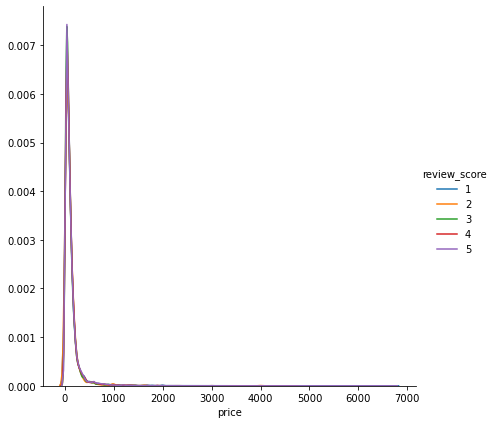

In [308]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"price")\
    .add_legend()
plt.show()

* This is right skewed.
* But all the pdf are highly overlapped.
* We cannot see any difference in price distribution.

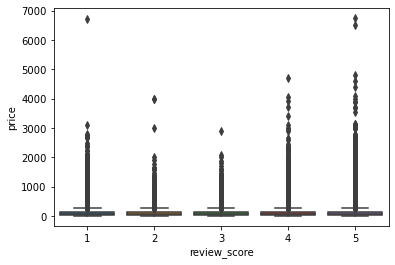

Mean 
 review_score
1    124.725093
2    113.992622
3    109.293010
4    118.955473
5    121.582446
Name: price, dtype: float64
90 percentile 
 review_score
1    229.99
2    209.99
3    210.00
4    220.00
5    229.99
Name: price, dtype: float64


In [318]:
sns.boxplot(y="price",x="review_score",data=data)
plt.show()

#mean price
print("Mean \n",data.groupby("review_score")["price"].mean())

#99.9% price
print("90 percentile \n",data.groupby("review_score")["price"].apply(lambda x: np.percentile(x,90)))

* Mean values of review_rating 3 is less compared to other scores.

In [319]:
lst=[50,75,80,85]    #let us check these percentile values
for i in lst:
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["price"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

50th percentile 
 review_score
1    74.9
2    71.4
3    69.9
4    75.0
5    74.9
Name: price, dtype: float64
****************************************
75th percentile 
 review_score
1    131.90
2    129.90
3    129.00
4    133.99
5    135.00
Name: price, dtype: float64
****************************************
80th percentile 
 review_score
1    149.98
2    149.00
3    149.00
4    150.00
5    152.00
Name: price, dtype: float64
****************************************
85th percentile 
 review_score
1    179.99
2    170.30
3    169.99
4    179.90
5    184.90
Name: price, dtype: float64
****************************************


* Median is almost same. Review_score 3 has lower median. But difference is not so significant.
* product with review_score 3 has lower price in almost all percentiles compared to other scores.

<b> freight_value

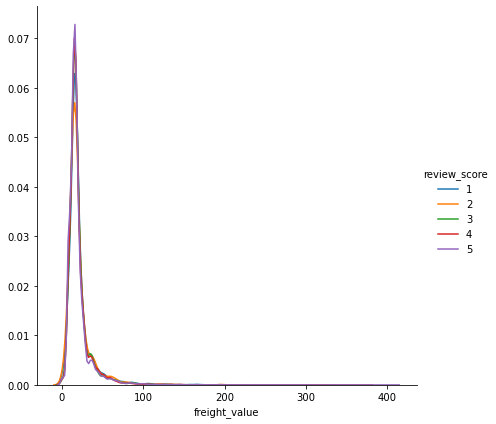

In [321]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(data,hue="review_score",height=6)\
    .map(sns.kdeplot,"freight_value")\
    .add_legend()
plt.show()

* freight value plot is also highly overlapped. 
* All the pdf s are at peak at lowere feight values. It is slightly right skewed distribution.

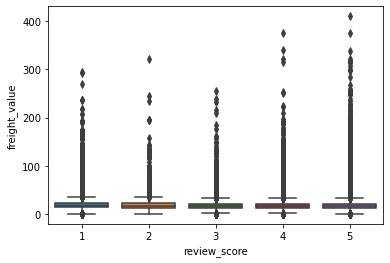

Mean 
 review_score
1    21.275085
2    20.807625
3    20.251760
4    20.130360
5    19.628751
Name: freight_value, dtype: float64
90 percentile 
 review_score
1    36.750
2    37.032
3    34.220
4    34.180
5    32.080
Name: freight_value, dtype: float64


In [322]:
sns.boxplot(y="freight_value",x="review_score",data=data)
plt.show()

#mean price
print("Mean \n",data.groupby("review_score")["freight_value"].mean())

#99.9% price
print("90 percentile \n",data.groupby("review_score")["freight_value"].apply(lambda x: np.percentile(x,90)))

* No helpful information we can get from this for classifying among review_scores.

In [323]:
lst=[50,75,80,85]    #let us check these percentile values
for i in lst:
    print("{}th percentile \n {}".format(i,data.groupby("review_score")["freight_value"].apply(lambda x: np.percentile(x,i))))
    print("*"*40)

50th percentile 
 review_score
1    16.92
2    16.45
3    16.60
4    16.48
5    16.11
Name: freight_value, dtype: float64
****************************************
75th percentile 
 review_score
1    22.59
2    22.17
3    21.61
4    21.50
5    20.77
Name: freight_value, dtype: float64
****************************************
80th percentile 
 review_score
1    25.12
2    25.03
3    23.50
4    23.60
5    22.95
Name: freight_value, dtype: float64
****************************************
85th percentile 
 review_score
1    28.640
2    28.796
3    27.014
4    27.010
5    25.700
Name: freight_value, dtype: float64
****************************************


<b> After the above analysis............
    - We have not got any feature than can alone distinguish among review_scores.
    - Some features tend to show some separation among the rview_scores, But there is no clear separation.